In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Any
import sys
import copy
import matplotlib.pyplot as plt
import itertools
from fractions import Fraction
from decimal import Decimal

from src.dataclass import (
    Input, Lattice, Parameter, Train, Save,
    Processed_Input, Topology, Conjugate, Result
)

from src.manage_data import Data
from src.manage_data import (
    filter_df, get_correlation_length, get_label, load_result, load_setting, delete_result)

from src.plot import log_fit, log_log_line

In [2]:
setting = load_setting()

# setting[setting["size"] == 20]
# setting

In [3]:
full_df = load_result("result") # load result from "result" or "temp" folder
full_df.columns.values

array(['key', 'state', 'size', 'dimension', 'ghost', 'initial', 'T', 'H',
       'Tc', 'Hc', 'Jm', 'Jv', 'mode', 'variable', 'multiply', 'base',
       'exponent', 'iteration', 'sweep', 'measurement', 'interval',
       'ensemble', 'max_workers', 'threshold', 'recent', 'environment',
       'save', 'order_parameter', 'susceptibility', 'binder_cumulant',
       'spin_glass_order', 'spin_glass_suscept', 'spin_glass_binder',
       'energy', 'specific_heat', 'irreducible_distance',
       'correlation_function', 'autocorrelation', 'time', 'location'],
      dtype=object)

In [4]:
# full_df

In [5]:
full_df.size/full_df.columns.values.size

1342.0

In [6]:
# delete = df[(df["dimension"] == 3) & (df["size"] == 20)]
# np.array(delete["key"])

In [7]:
# delete_result("temp", ["000000"])

In [8]:
# delete_result("result", np.array(delete["key"])) # delete "key".pkl file in "result" or "temp" folder

In [9]:
# df[(df["size"] == 8) & (df["Jv"] == 0.1)].sort_values("T", ascending=True)

In [10]:
state, dimension = (2, 3)

yt, yh, Tc = (Fraction(3,2), Fraction(5,2), 4.4)
print(yt, yh, Tc)

alpha, beta, gamma, delta, nu, eta = (
    2-dimension/yt,
    (dimension-yh)/yt,
    (2*yh-dimension)/yt,
    yh/(dimension-yh),
    1/yt,
    dimension-2*yh+2,
)

print(f"{yt=}, {yh=}, {Tc=}")
print(f"{alpha=}, {beta=}, {gamma=}, {delta=}, {nu=}, {eta=}")

#* Filter data at same universality class (identical state and dimension)
filtered_df = filter_df(full_df, state=state, dimension=dimension)
available_sizes = sorted(set(filtered_df["size"].values))
available_Jvs = sorted(set(filtered_df["Jv"].values))
print(available_sizes, available_Jvs)

# print(result[size_list.index(64),Jv_list.index(0.0)].order_parameter)

3/2 5/2 4.4
yt=Fraction(3, 2), yh=Fraction(5, 2), Tc=4.4
alpha=Fraction(0, 1), beta=Fraction(1, 3), gamma=Fraction(4, 3), delta=Fraction(5, 1), nu=Fraction(2, 3), eta=Fraction(0, 1)
[8, 16] [0.0]


In [11]:
filtered_df

,key,state,size,dimension,ghost,initial,T,H,Tc,Hc,...,spin_glass_order,spin_glass_suscept,spin_glass_binder,energy,specific_heat,irreducible_distance,correlation_function,autocorrelation,time,location
266,d4c0c5,2,16,3,0,uniform,0.5000,0.0,2.7,0.0,...,1.000000,0.000000,0.666667,-3.000000,0.000000,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",111.362805,result
1283,9b09a5,2,16,3,0,uniform,1.0000,0.0,2.7,0.0,...,0.999975,0.000025,0.666667,-2.999926,0.000887,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[2.4624607490864037e-05, 9.78290396839536e-09,...","[1.0, 0.9999828338623047, 0.9999904632568359, ...",111.078317,result
323,da3b10,2,16,3,0,uniform,1.5000,0.0,2.7,0.0,...,0.998622,0.000917,0.666666,-2.995886,0.022223,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.0013775188699440832, 6.319930918152746e-06,...","[1.0, 0.9992599487304688, 0.9992713928222656, ...",112.189486,result
608,98275e,2,16,3,0,uniform,2.0000,0.0,2.7,0.0,...,0.989072,0.005376,0.666663,-2.967771,0.101724,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.010928178777732, 0.00018575885176138251, 5....","[1.0, 0.9947910308837891, 0.9944915771484375, ...",112.293945,result
371,25309c,2,16,3,0,uniform,2.5000,0.0,2.7,0.0,...,0.959327,0.015368,0.666653,-2.882637,0.250410,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.040672528302494015, 0.0015538132444371888, ...","[1.0, 0.9817180633544922, 0.9797000885009766, ...",115.569143,result
12,b726b2,2,16,3,0,uniform,3.0000,0.0,2.7,0.0,...,0.894727,0.030347,0.666630,-2.705651,0.469331,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.10527344788401649, 0.007162366440032499, 0....","[1.0, 0.956573486328125, 0.94842529296875, 0.9...",116.189206,result
556,e9ffdd,2,16,3,0,uniform,3.5000,0.0,2.7,0.0,...,0.775547,0.047031,0.666578,-2.399415,0.772622,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.22445343555465058, 0.024268562668088602, 0....","[1.0, 0.91748046875, 0.8938026428222656, 0.886...",113.158279,result
1326,132ace,2,16,3,0,uniform,4.0000,0.0,2.7,0.0,...,0.563954,0.060288,0.666420,-1.908452,1.229522,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.43604619641770626, 0.07221296061407163, 0.0...","[1.0, 0.8631439208984375, 0.8095321655273438, ...",113.280036,result
1233,65a12e,2,16,3,0,uniform,4.1000,0.0,4.5,0.0,...,0.502877,0.062566,0.666337,-1.778717,1.364341,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.4971225895838245, 0.09004610220230803, 0.02...","[1.0, 0.8536052703857422, 0.7928924560546875, ...",112.457072,result
733,bca4c0,2,16,3,0,uniform,4.2000,0.0,4.5,0.0,...,0.431634,0.063458,0.666201,-1.634447,1.523655,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[0.5683661701552296, 0.11320117192076878, 0.04...","[1.0, 0.8403949737548828, 0.7727508544921875, ...",113.100547,result


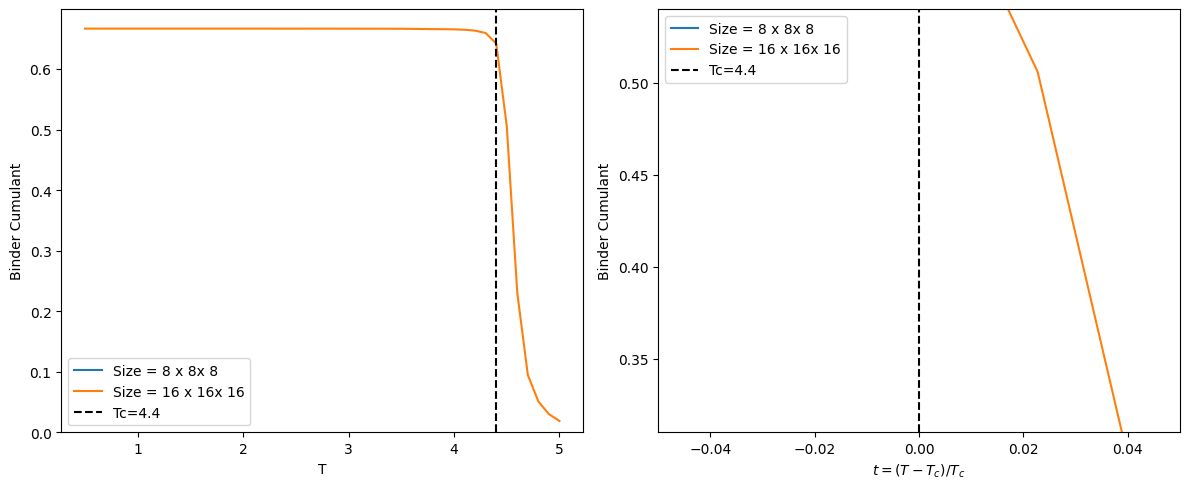

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Query
state, dimension, Jv = 2, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

# Main plot
for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax1.plot(data.temperature, data.binder_cumulant, label=get_label(data, "size"))
    ax2.plot((data.temperature - Tc) / Tc, data.binder_cumulant, label=get_label(data, "size"))

    x, y = data.temperature, data.binder_cumulant
    mask = y <= 1
    x, y = x[mask], y[mask]


# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")
ax2.axvline(0.0, linestyle="--", color="k", label=f"Tc={Tc}")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Binder Cumulant")
ax2.legend()
ax2.set_xlabel(r"$t=(T-T_c)/T_c$")
ax2.set_xlim([-0.05, 0.05])
ax2.set_ylim([0.31, 0.54])
ax2.set_ylabel("Binder Cumulant")

fig.tight_layout()

plt.show()

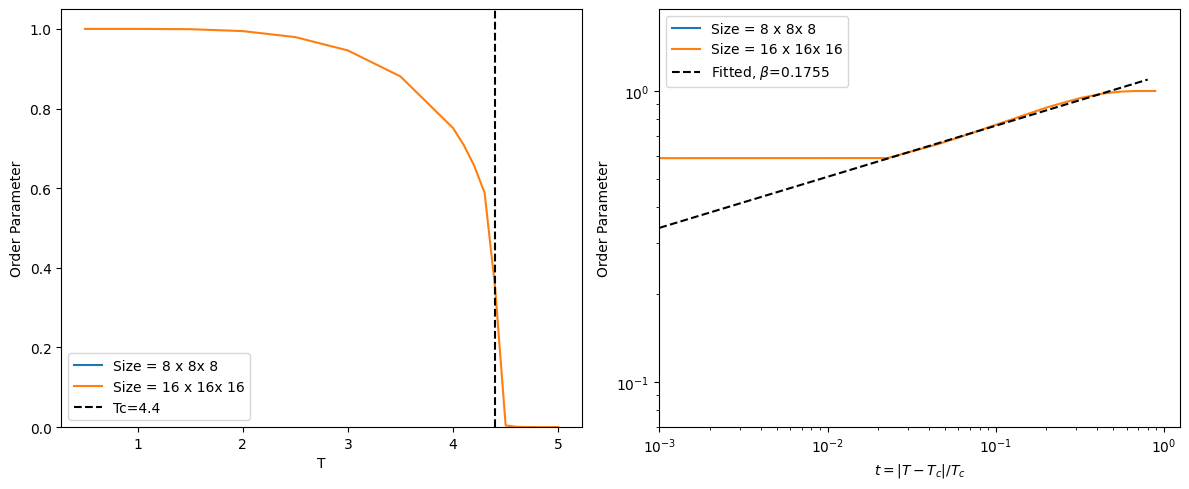

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Query
state, dimension, Jv = 2, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax1.plot(data.temperature, data.order_parameter, label=get_label(data, "size"))
    ax2.plot((Tc-data.temperature) / Tc, data.order_parameter, label=get_label(data, "size"))

    # Fitting line at largest system size
    if size == max(available_sizes):
        x, y = (Tc-data.temperature) / Tc, data.order_parameter
        mask = (1e-2 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax2.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\beta$={slope:.4f}")

# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")

# # guide line
# x0, y0, slope, x1 = 1e-3, 5e-1, beta, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax2, label=fr"FSS, $\beta$={float(beta):.4f}", color="k")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Order Parameter")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel(r"$t=|T-T_c|/T_c$")
ax2.set_ylabel("Order Parameter")
ax2.set_xlim([1.e-3, None])
ax2.set_ylim([7.e-2, None])

fig.tight_layout()

plt.show()

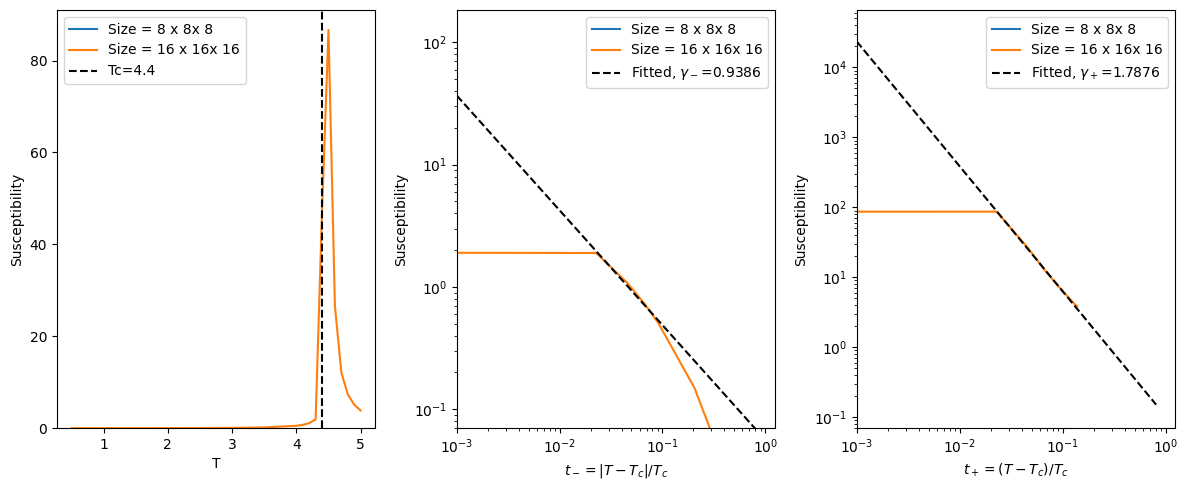

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

# Query
state, dimension, Jv = 2, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax1.plot(data.temperature, data.susceptibility, label=get_label(data, "size"))
    ax2.plot((Tc-data.temperature) / Tc, data.susceptibility, label=get_label(data, "size"))
    ax3.plot((data.temperature-Tc) / Tc, data.susceptibility, label=get_label(data, "size"))

    # Fitting line at largest system size
    if size == max(available_sizes):
        x, y = (Tc-data.temperature) / Tc, data.susceptibility
        mask = (1e-2 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax2.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\gamma_-$={np.abs(slope):.4f}")
        
        x, y = (data.temperature-Tc) / Tc, data.susceptibility
        mask = (5*1e-3 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax3.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\gamma_+$={np.abs(slope):.4f}")        

# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")

# # guide line
# x0, y0, slope, x1 = 1e-3, 1e1, -gamma, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax2, label=fr"FSS, $\gamma$={float(gamma):.4f}", color="k")
# x0, y0, slope, x1 = 1e-3, 1e1, -gamma, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax3, label=fr"FSS, $\gamma$={float(gamma):.4f}", color="k")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Susceptibility")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax2.set_ylabel("Susceptibility")
ax2.set_xlim([1.e-3, None])
ax2.set_ylim([7.e-2, None])

ax3.legend()
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax3.set_ylabel("Susceptibility")
ax3.set_xlim([1.e-3, None])
ax3.set_ylim([7.e-2, None])

fig.tight_layout()

plt.show()

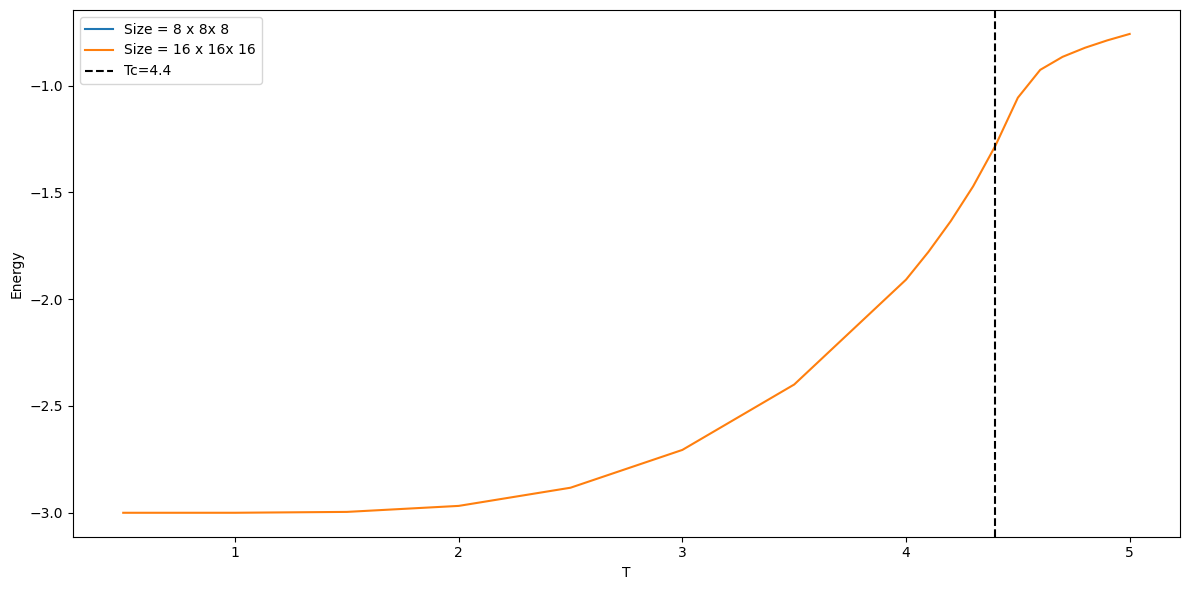

In [15]:
fig, ax = plt.subplots(ncols=1, figsize=(12, 6))

# Query
state, dimension, Jv = 2, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax.plot(data.temperature, data.energy, label=get_label(data, "size"))

# Additional lines
ax.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")
# ax.set_ylim([0, None])
ax.legend()
ax.set_xlabel("T")
ax.set_ylabel("Energy")

fig.tight_layout()

plt.show()

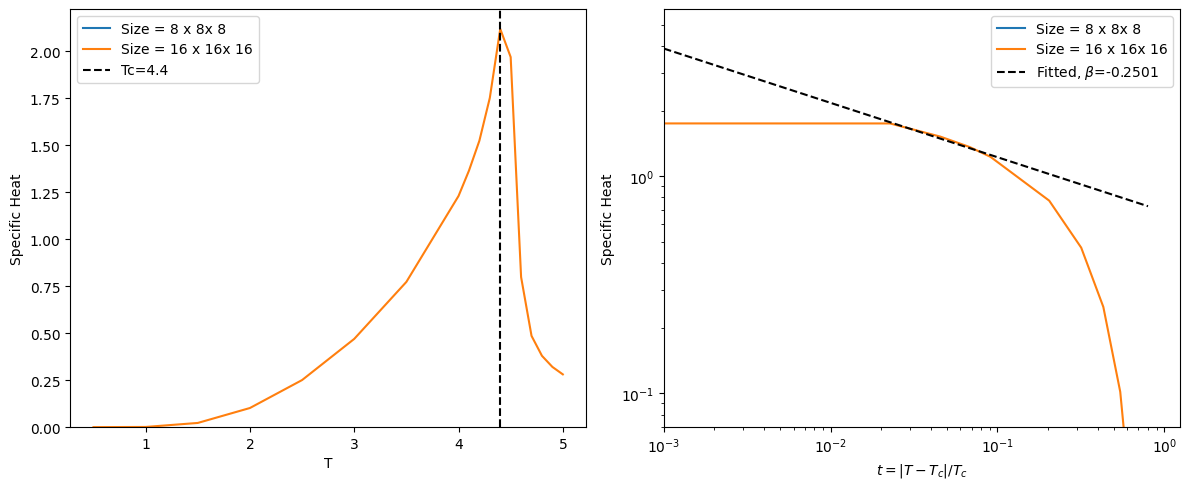

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Query
state, dimension, Jv = 2, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    ax1.plot(data.temperature, data.specific_heat, label=get_label(data, "size"))
    ax2.plot((Tc-data.temperature) / Tc, data.specific_heat, label=get_label(data, "size"))

    # Fitting line at largest system size
    if size == max(available_sizes):
        x, y = (Tc-data.temperature) / Tc, data.specific_heat
        mask = (1e-2 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax2.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\beta$={slope:.4f}")

# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")

# # guide line
# x0, y0, slope, x1 = 1e-3, 5e-1, beta, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax2, label=fr"FSS, $\beta$={float(beta):.4f}", color="k")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Specific Heat")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel(r"$t=|T-T_c|/T_c$")
ax2.set_ylabel("Specific Heat")
ax2.set_xlim([1.e-3, None])
ax2.set_ylim([7.e-2, None])

fig.tight_layout()

plt.show()

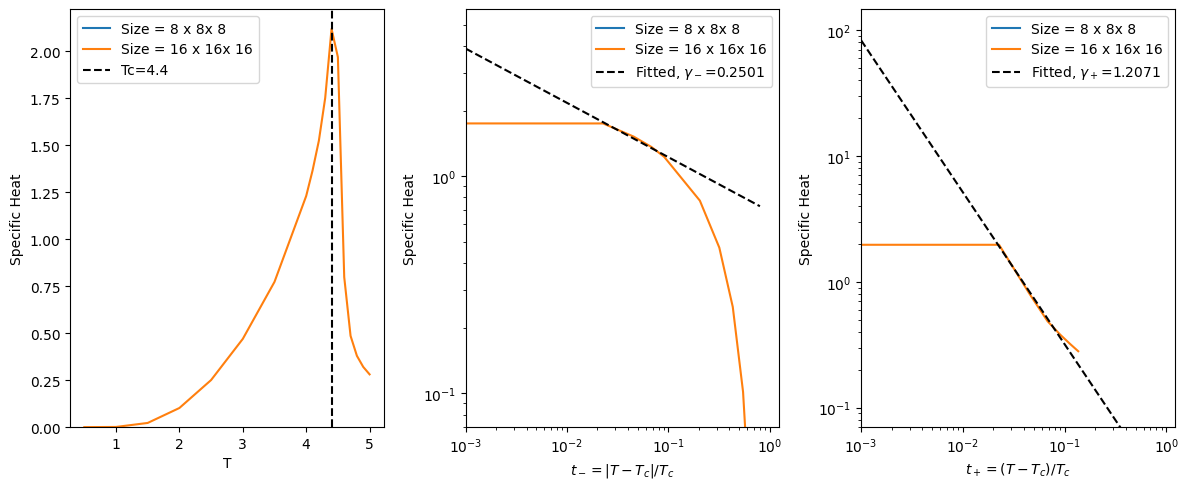

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5))

# Query
state, dimension, Jv = 2, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

for size in available_sizes:
    data = Data.from_df(filter_df(filtered_df, size=size))
    result = data.specific_heat
    
    ax1.plot(data.temperature, result, label=get_label(data, "size"))
    ax2.plot((Tc-data.temperature) / Tc, result, label=get_label(data, "size"))
    ax3.plot((data.temperature-Tc) / Tc, result, label=get_label(data, "size"))

    # Fitting line at largest system size
    if size == max(available_sizes):
        x, y = (Tc-data.temperature) / Tc, result
        mask = (1e-2 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax2.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\gamma_-$={np.abs(slope):.4f}")
        
        x, y = (data.temperature-Tc) / Tc, result
        mask = (5*1e-3 < x) * (x < 1e-1)  # [False, False, ..... ,True, True, ...., False, False]
        fit_x, fit_y, slope, _ = log_fit(x[mask], y[mask], start=1e-3, end=8e-1)
        ax3.plot(fit_x, fit_y, "k--", label=fr"Fitted, $\gamma_+$={np.abs(slope):.4f}")        

# Additional lines
ax1.axvline(Tc, linestyle="--", color="k", label=f"Tc={Tc}")

# # guide line
# x0, y0, slope, x1 = 1e-3, 1e1, -gamma, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax2, label=fr"FSS, $\gamma$={float(gamma):.4f}", color="k")
# x0, y0, slope, x1 = 1e-3, 1e1, -gamma, 8e-1
# log_log_line(x0, y0, float(slope), x1, ax3, label=fr"FSS, $\gamma$={float(gamma):.4f}", color="k")

ax1.set_ylim([0, None])
ax1.legend()
ax1.set_xlabel("T")
ax1.set_ylabel("Specific Heat")

ax2.legend()
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax2.set_ylabel("Specific Heat")
ax2.set_xlim([1.e-3, None])
ax2.set_ylim([7.e-2, None])

ax3.legend()
ax3.set_yscale("log")
ax3.set_xscale("log")
ax3.set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax3.set_ylabel("Specific Heat")
ax3.set_xlim([1.e-3, None])
ax3.set_ylim([7.e-2, None])

fig.tight_layout()

plt.show()

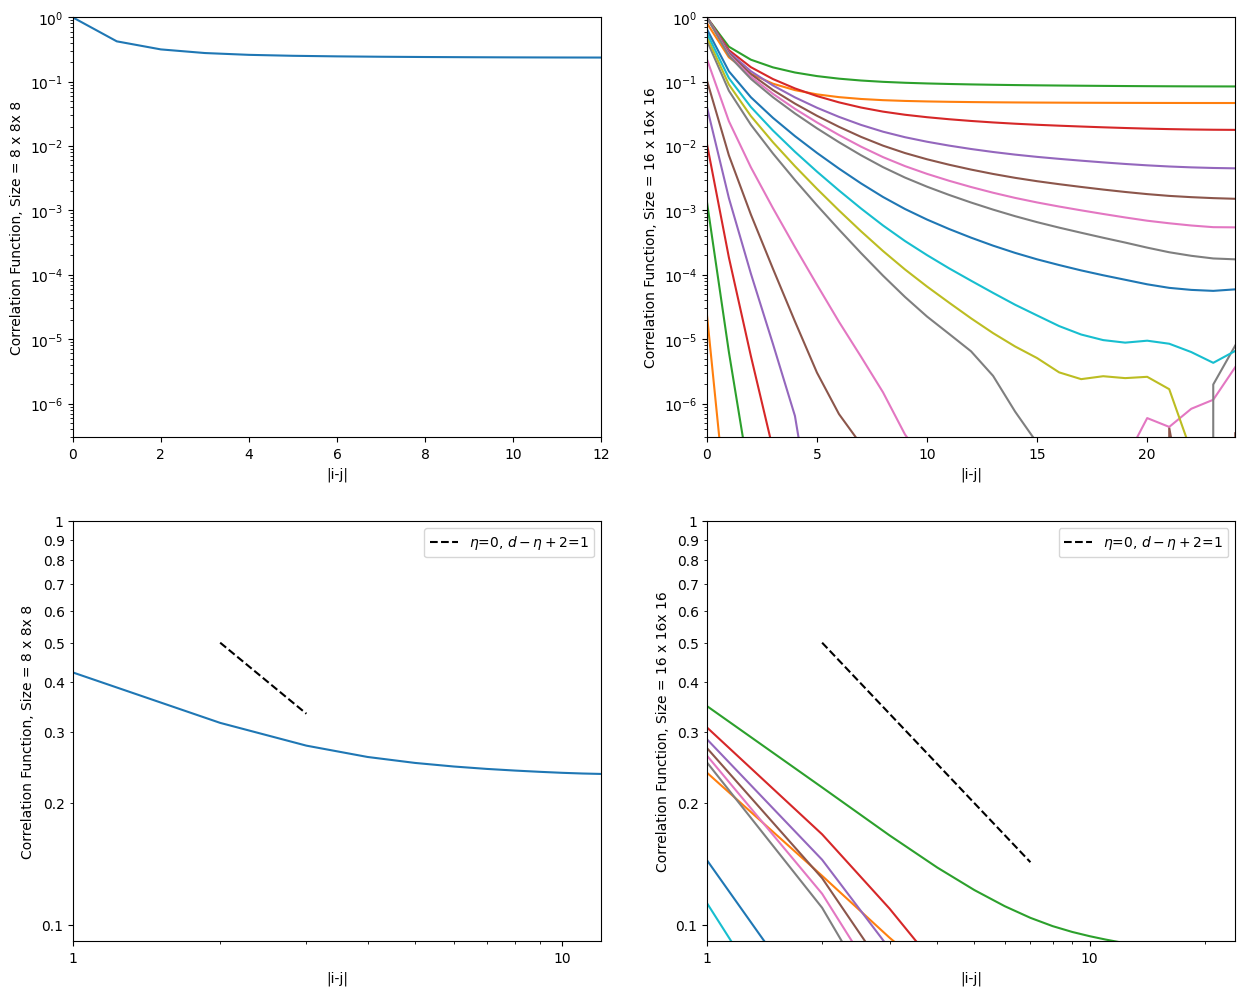

In [18]:
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda y, _: "{:.8g}".format(y))

# Query
state, dimension, Jv = 2, 3, 0.0
filtered_df = filter_df(full_df, state=state, dimension=dimension, Jv=Jv)
available_sizes = sorted(set(filtered_df["size"].values))

fig, ax = plt.subplots(nrows=2, ncols=np.size(available_sizes), figsize=(15, 12))

for i, size in enumerate(available_sizes):
    data = Data.from_df(filter_df(filtered_df, size=size))
    
    for j, irr_dist in enumerate(data.irreducible_distance):
        ax[0,i].plot(irr_dist, data.correlation_function[j])
        ax[1,i].plot(irr_dist, data.correlation_function[j])
    
    def g(x):
        return 1/x**(dimension-2+eta)
    x = np.arange(2,data.size/2)
    ax[1,i].plot(x,g(x),"--",color="k", label=fr"$\eta$={eta}, $d-\eta+2$={dimension-2+eta}")

    ax[0,i].set_yscale("log")
    ax[0,i].set_xlim(0, data.size*data.dimension/2)
    ax[0,i].set_ylim(3.e-7, 1.)
    ax[0,i].set_xlabel("|i-j|")
    ax[0,i].set_ylabel(f"Correlation Function, {get_label(data, 'size')}")
    
    ax[1,i].loglog()
    ax[1,i].set_xlim(1, data.size*data.dimension/2)
    ax[1,i].set_ylim(0.091, 1.)
    ax[1,i].legend(loc="best")
    ax[1,i].set_xlabel("|i-j|")
    ax[1,i].set_ylabel(f"Correlation Function, {get_label(data, 'size')}")
    
    ax[1,i].xaxis.set_major_formatter(formatter)
    # ax[1,i].xaxis.set_minor_formatter(formatter)
    ax[1,i].yaxis.set_major_formatter(formatter)
    ax[1,i].yaxis.set_minor_formatter(formatter)

# plt.legend()
plt.show()

In [ ]:
Jv = 0.0

for data in result[:, Jv_list.index(Jv)]:
    data.correlation_length = get_correlation_length(data)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

for data in result[size_list.index(16):size_list.index(20)+1, Jv_list.index(Jv)]:
    ax[0].plot(data.temperature, data.correlation_length, label=get_label(data, "size"))
    ax[1].plot((Tc-data.temperature)/Tc, data.correlation_length, label=get_label(data, "size"))
    ax[2].plot((data.temperature-Tc)/Tc, data.correlation_length, label=get_label(data, "size"))

ax[0].vlines(Tc, 0, 30, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(-nu)
x = np.linspace(0.0001, 1, 100)
ax[1].plot(x, g(x), "--", color="k", label = fr"$\nu$={nu}")
ax[2].plot(x, g(x), "--", color="k", label = fr"$\nu$={nu}")

ax[0].legend(loc="best")
ax[0].set_ylim([0, None])
ax[0].set_xlabel("T")
ax[0].set_ylabel("Correlation Length")

ax[1].legend(loc="best")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax[1].set_ylabel("Correlation Length")
ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([3.e-2, None])

ax[2].legend(loc="best")
ax[2].set_yscale("log")
ax[2].set_xscale("log")
ax[2].set_xlabel(r"$t_+=(T-T_c)/T_c$")
ax[2].set_ylabel("Correlation Length")
ax[2].set_xlim([1.e-3, None])
ax[2].set_ylim([3.e-2, None])

plt.legend()
plt.show()

In [ ]:
# x_min, x_max = (1, size/max(16/np.sqrt(size),8))

# measure_eta = []

# for i, distance_list in enumerate(np.array(corr["irreducible_distance"])):
#     correlation = np.array(corr["correlation_function"])[i]
#     x, y = [], []
#     for j, distance in enumerate(distance_list):
#         if(x_min <= distance <= x_max):
#             x.append(np.log(distance))
#             y.append(np.log(correlation[j]))
    
#     x, y = np.array(x).reshape((-1, 1)), np.array(y)
    
#     # print(x, y)
#     model = LinearRegression().fit(x, y)
#     measure_eta.append(2-dimension-model.coef_)

# measure_eta = np.average(measure_eta)

# print(f"measure eta = {measure_eta}")
# print(f"real eta: {eta}")

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.binder_cumulant, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_binder, label=get_label(data, "Jv"))
    
ax[0].vlines(Tc, 0, 0.7, linestyle="--", color="k", label=f"Tc={Tc}")
# ax[1].vlines(0, 0, 0.7, linestyle="--", color="k", label=f"Tc={Tc}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Binder Cumulant")
ax[1].legend(loc="best")
ax[1].set_xlabel(r"$t=(T-T_c)/T_c$")
# ax[1].set_xlim([-0.05, 0.05])
# ax[1].set_ylim([0.31, 0.54])
ax[1].set_ylabel("Spin Glass Binder Cumulant")

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.order_parameter, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_order, label=get_label(data, "Jv"))

ax[0].vlines(Tc, 0, 1, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(beta)
x = np.linspace(0.0001, 1, 100)
# ax[1].plot(x, g(x), "--", color="k", label = fr"$\beta$={beta}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Order Parameter")

ax[1].legend(loc="best")
# ax[1].set_yscale("log")
# ax[1].set_xscale("log")
# ax[1].set_xlabel(r"$t=|T-T_c|/T_c$")
ax[1].set_xlabel("T")
ax[1].set_ylabel("Spin Glass Order Parameter")
# ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([0, None])

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax[0].plot(data.temperature, data.susceptibility, label=get_label(data, "Jv"))
    ax[1].plot(data.temperature, data.spin_glass_suscept, label=get_label(data, "Jv"))

ax[0].vlines(Tc, 0, 5, linestyle="--", color="k", label=f"Tc={Tc}")

def g(x):
    return x**(-gamma)
x = np.linspace(0.0001, 1, 10)
# ax[1].plot(x, g(x), "--", color="k", label = fr"$\gamma$={gamma}")
# ax[2].plot(x, g(x), "--", color="k", label = fr"$\gamma$={gamma}")

ax[0].set_ylim([0, None])
ax[0].legend(loc="best")
ax[0].set_xlabel("T")
ax[0].set_ylabel("Susceptibility")

ax[1].legend(loc="best")
# ax[1].set_yscale("log")
# ax[1].set_xscale("log")
ax[1].set_xlabel(r"$t_-=|T-T_c|/T_c$")
ax[1].set_ylabel("Spin Glass Susceptibility")
# ax[1].set_xlim([1.e-3, None])
ax[1].set_ylim([0.e-2, None])

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax.plot(data.temperature, data.energy, label=get_label(data, "Jv"))

ax.vlines(Tc, -2, -0.5, linestyle="--", color="k", label=f"Tc={Tc}")

# ax.set_ylim([-2, None])
ax.legend(loc="best")
ax.set_xlabel("T")
ax.set_ylabel("Energy")

plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

size = 16

for data in result[size_list.index(size), :]:
    ax.plot(data.temperature, data.specific_heat, label=get_label(data, "Jv"))

ax.vlines(Tc, 0, 5, linestyle="--", color="k", label=f"Tc={Tc}")


ax.set_ylim([0, None])
ax.legend(loc="best")
ax.set_xlabel("T")
ax.set_ylabel("Specific heat")

plt.show()